#### Imports

In [2]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Global variables

In [22]:
# The models with different sealing mechanism used in this test.
rings = ['O-ring','NAPN','NAP310','PK','KDN','O-ring257','X-ring257']
# The models with different cross-sectional shape used in this test.
shapes = ['Circle','Stadium','Kidney','Stadium_lc','Kidney_lc']
# Remove first 15 data points to avoid deviating starting values
drop_amount = 15 

# Static leakage test

In [23]:
static_leakage = {}
for ring in rings:
    ring_df = pd.read_csv(f'./data/static/{ring}.csv',delimiter='\s+',header=None,names=(['Time','A','B','C','Laser(mm)','Pressure(bar)','Force(N)']))
    ring_df.drop(columns=['A','B','C'],index=ring_df.index[range(drop_amount)],axis=1,inplace=True)
    
    static_leakage[ring] = {}
    # Filtering the data with a rolling window and sampling the data
    static_leakage[ring]['Time'] = ring_df['Time'].head(130000).rolling(window=100).mean()[::1000]/1000

    static_leakage[ring]['PressureDrop(bar)'] = ring_df['Pressure(bar)'] - ring_df['Pressure(bar)'][drop_amount]
    
    static_leakage[ring]['Pressure(bar)'] = ring_df['Pressure(bar)'].head(130000).rolling(window=100).mean()[::1000]/10
    static_leakage[ring]['PressureDrop(bar)'] = static_leakage[ring]['PressureDrop(bar)'].head(130000).rolling(window=100).mean()[::1000]/10
    
    static_leakage[ring]['PressureDrop(bar)'][drop_amount] = 0
    
for shape in shapes:
    shape_df = pd.read_csv(f'./data/static/{shape}.csv',delimiter='\s+',header=None,names=(['Time','A','B','C','Laser(mm)','Pressure(bar)','Force(N)']))
    shape_df.drop(columns=['A','B','C'],index=shape_df.index[range(drop_amount)],axis=1,inplace=True)

    static_leakage[shape] = {}
    # Filtering the data with a rolling window and sampling the data
    static_leakage[shape]['Time'] = shape_df['Time'].head(130000).rolling(window=100).mean()[::1000]/1000

    static_leakage[shape]['PressureDrop(bar)'] = shape_df['Pressure(bar)'] - shape_df['Pressure(bar)'][drop_amount]
    
    static_leakage[shape]['Pressure(bar)'] = shape_df['Pressure(bar)'].head(130000).rolling(window=100).mean()[::1000]/10
    static_leakage[shape]['PressureDrop(bar)'] = static_leakage[shape]['PressureDrop(bar)'].head(130000).rolling(window=100).mean()[::1000]/10
    
    static_leakage[shape]['PressureDrop(bar)'][drop_amount] = 0
    

#### Static leakage plot 25mm

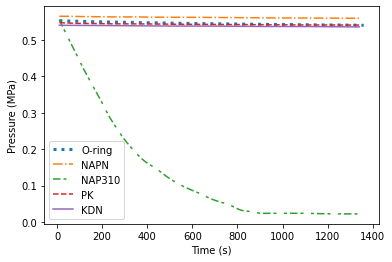

In [5]:
plt.plot(static_leakage['O-ring']['Time'],static_leakage['O-ring']['Pressure(bar)'],'tab:blue',label='O-ring',linestyle='dotted',linewidth=3)    
plt.plot(static_leakage['NAPN']['Time'],static_leakage['NAPN']['Pressure(bar)'],'tab:orange',label='NAPN',linestyle='dashdot')
plt.plot(static_leakage['NAP310']['Time'],static_leakage['NAP310']['Pressure(bar)'],'tab:green',label='NAP310', linestyle=(0,(5,2,2)))
plt.plot(static_leakage['PK']['Time'],static_leakage['PK']['Pressure(bar)'],'tab:red',label='PK',linestyle='dashed')
plt.plot(static_leakage['KDN']['Time'],static_leakage['KDN']['Pressure(bar)'],'tab:purple',label='KDN')

plt.xlabel('Time (s)')
plt.ylabel('Pressure (MPa)')
plt.legend()
plt.savefig('./figures/test_2_static_leakage.pdf',bbox_inches = 'tight')



#### Static leakage plot 25mm (without NAP310 for clarity)

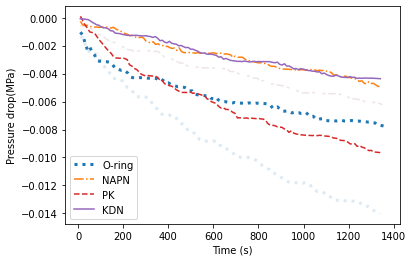

In [6]:
# Substracting the initial pressure from the data to account for pressure drop
plt.plot(static_leakage['O-ring257']['Time'],static_leakage['O-ring']['PressureDrop(bar)'],'tab:blue',alpha=0.15, linestyle='dotted',linewidth=3)
plt.plot(static_leakage['X-ring257']['Time'],static_leakage['NAPN']['PressureDrop(bar)'],'tab:brown',alpha=0.15, linestyle=(0,(5,2,2)))
plt.plot(static_leakage['O-ring']['Time'],static_leakage['PK']['PressureDrop(bar)'],'tab:blue',label='O-ring',linestyle='dotted',linewidth=3)   
plt.plot(static_leakage['NAPN']['Time'],static_leakage['KDN']['PressureDrop(bar)'],'tab:orange',label='NAPN',linestyle='dashdot')
plt.plot(static_leakage['PK']['Time'],static_leakage['O-ring257']['PressureDrop(bar)'],'tab:red',label='PK',linestyle='dashed')
plt.plot(static_leakage['KDN']['Time'],static_leakage['X-ring257']['PressureDrop(bar)'],'tab:purple',label='KDN')
plt.xlabel('Time (s)')
plt.ylabel('Pressure drop(MPa)')
plt.legend()
plt.savefig('./figures/test_2_static_leakage_part.pdf',bbox_inches = 'tight')



#### Static leakage plot 25.7mm (without NAP310 for clarity)

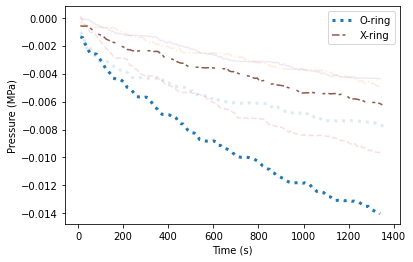

In [7]:
# Substracting the initial pressure from the data to account for pressure drop
plt.plot(static_leakage['O-ring']['Time'],static_leakage['PK']['PressureDrop(bar)'],'tab:blue',alpha=0.15, linestyle='dotted',linewidth=3)   
plt.plot(static_leakage['NAPN']['Time'],static_leakage['KDN']['PressureDrop(bar)'],'tab:orange',alpha=0.15, linestyle='dashdot')
plt.plot(static_leakage['PK']['Time'],static_leakage['O-ring257']['PressureDrop(bar)'],'tab:red',alpha=0.15,linestyle='dashed')
plt.plot(static_leakage['KDN']['Time'],static_leakage['X-ring257']['PressureDrop(bar)'],'tab:purple',alpha=0.15)
plt.plot(static_leakage['O-ring257']['Time'],static_leakage['O-ring']['PressureDrop(bar)'],'tab:blue',label='O-ring',linestyle='dotted',linewidth=3)
plt.plot(static_leakage['X-ring257']['Time'],static_leakage['NAPN']['PressureDrop(bar)'],'tab:brown',label='X-ring', linestyle=(0,(5,2,2)))

plt.xlabel('Time (s)')
plt.ylabel('Pressure (MPa)')
plt.legend()
plt.savefig('./figures/test_2_static_leakage_257.pdf',bbox_inches = 'tight')



#### Static leakage plot different shapes

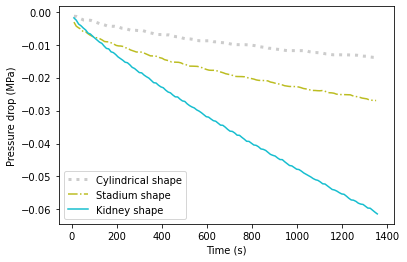

In [25]:
plt.plot(static_leakage['Circle']['Time'],static_leakage['Circle']['PressureDrop(bar)'],'0.8',label='Cylindrical shape', linestyle='dotted',linewidth=3)  
plt.plot(static_leakage['Stadium']['Time'],static_leakage['Stadium']['PressureDrop(bar)'],'tab:olive',label='Stadium shape',linestyle='dashdot')
plt.plot(static_leakage['Kidney']['Time'],static_leakage['Kidney']['PressureDrop(bar)'],'tab:cyan',label='Kidney shape')

plt.xlabel('Time (s)')
plt.ylabel('Pressure drop (MPa)')
plt.legend()
plt.savefig('./figures/test_2_static_leakage_shapes.pdf',bbox_inches = 'tight')



#### Static leakage plot different shapes with lower clearance

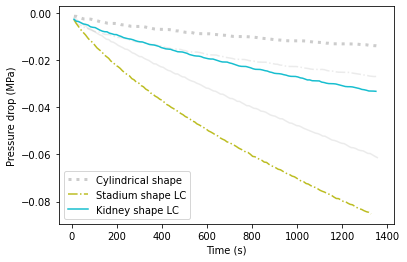

In [26]:
plt.plot(static_leakage['Stadium']['Time'],static_leakage['Stadium']['PressureDrop(bar)'],'tab:grey',alpha=0.15,linestyle='dashdot')
plt.plot(static_leakage['Kidney']['Time'],static_leakage['Kidney']['PressureDrop(bar)'],'tab:grey',alpha=0.15)

plt.plot(static_leakage['Circle']['Time'],static_leakage['Circle']['PressureDrop(bar)'],'0.8',label='Cylindrical shape', linestyle='dotted',linewidth=3)  
plt.plot(static_leakage['Stadium_lc']['Time'],static_leakage['Stadium_lc']['PressureDrop(bar)'],'tab:olive',label='Stadium shape LC',linestyle='dashdot')
plt.plot(static_leakage['Kidney_lc']['Time'],static_leakage['Kidney_lc']['PressureDrop(bar)'],'tab:cyan',label='Kidney shape LC')

plt.xlabel('Time (s)')
plt.ylabel('Pressure drop (MPa)')
plt.legend()
plt.savefig('./figures/test_2_static_leakage_shapes_lc.pdf',bbox_inches = 'tight')


# Repeatablilty

### Reconnected

In [11]:
# Store repeatability data in a dictionary
static_reconnected = {}

# Iterate all 3 repeated tests and add them to the dictionary
for test in range(1,4):
    test_df = pd.read_csv(f'./data/repeatability/reconnected/static/{test}_O-ring257.csv',delimiter='\s+',header=None,names=(['Time','A','B','C','Laser(mm)','Pressure(bar)','Force(N)']))
    test_df.drop(columns=['A','B','C'],index=test_df.index[range(drop_amount)],axis=1,inplace=True)
    
    static_reconnected[test] = {}
    # Filtetest the data with a rolling window and sampling the data
    static_reconnected[test]['Time'] = test_df['Time'].head(130000).rolling(window=100).mean()[::1000]/1000

    static_reconnected[test]['PressureDrop(bar)'] = test_df['Pressure(bar)'] - test_df['Pressure(bar)'][drop_amount]
    
    static_reconnected[test]['Pressure(bar)'] = test_df['Pressure(bar)'].head(130000).rolling(window=100).mean()[::1000]/10
    static_reconnected[test]['PressureDrop(bar)'] = static_reconnected[test]['PressureDrop(bar)'].head(130000).rolling(window=100).mean()[::1000]/10
    
    static_reconnected[test]['PressureDrop(bar)'][drop_amount] = 0
    

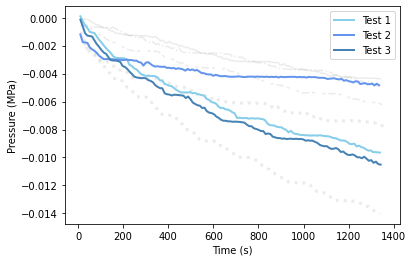

In [14]:
# Substracting the initial pressure from the data to account for pressure drop
plt.plot(static_leakage['O-ring']['Time'],static_leakage['PK']['PressureDrop(bar)'],'tab:grey',alpha=0.15, linestyle='dotted',linewidth=3)   
plt.plot(static_leakage['NAPN']['Time'],static_leakage['KDN']['PressureDrop(bar)'],'tab:grey',alpha=0.15, linestyle='dashdot')
plt.plot(static_leakage['PK']['Time'],static_leakage['O-ring257']['PressureDrop(bar)'],'tab:grey',alpha=0.15,linestyle='dashed')
plt.plot(static_leakage['KDN']['Time'],static_leakage['X-ring257']['PressureDrop(bar)'],'tab:grey',alpha=0.15)
plt.plot(static_leakage['O-ring257']['Time'],static_leakage['O-ring']['PressureDrop(bar)'],'tab:grey',alpha=0.15,linestyle='dotted',linewidth=3)
plt.plot(static_leakage['X-ring257']['Time'],static_leakage['NAPN']['PressureDrop(bar)'],'tab:grey',alpha=0.15, linestyle=(0,(5,2,2)))

plt.plot(static_reconnected[1]['Time'],static_reconnected[1]['PressureDrop(bar)'],'skyblue',label='Test 1',linewidth=2)
plt.plot(static_reconnected[2]['Time'],static_reconnected[2]['PressureDrop(bar)'],'cornflowerblue',label='Test 2',linewidth=2)
plt.plot(static_reconnected[3]['Time'],static_reconnected[3]['PressureDrop(bar)'],'steelblue',label='Test 3',linewidth=2)

plt.xlabel('Time (s)')
plt.ylabel('Pressure (MPa)')
plt.legend()
plt.savefig('./figures/reconnected_static_leakage.pdf',bbox_inches = 'tight')



### Rerun

In [18]:
# Store repeatability data in a dictionary
static_rerun = {}

# Iterate all 3 repeated tests and add them to the dictionary
for test in range(1,4):
    test_df = pd.read_csv(f'./data/repeatability/rerun/static/{test}_O-ring257.csv',delimiter='\s+',header=None,names=(['Time','A','B','C','Laser(mm)','Pressure(bar)','Force(N)']))
    test_df.drop(columns=['A','B','C'],index=test_df.index[range(drop_amount)],axis=1,inplace=True)
    
    static_rerun[test] = {}
    # Filtetest the data with a rolling window and sampling the data
    static_rerun[test]['Time'] = test_df['Time'].head(130000).rolling(window=100).mean()[::1000]/1000

    static_rerun[test]['PressureDrop(bar)'] = test_df['Pressure(bar)'] - test_df['Pressure(bar)'][drop_amount]
    
    static_rerun[test]['Pressure(bar)'] = test_df['Pressure(bar)'].head(130000).rolling(window=100).mean()[::1000]/10
    static_rerun[test]['PressureDrop(bar)'] = static_rerun[test]['PressureDrop(bar)'].head(130000).rolling(window=100).mean()[::1000]/10
    
    static_rerun[test]['PressureDrop(bar)'][drop_amount] = 0
    

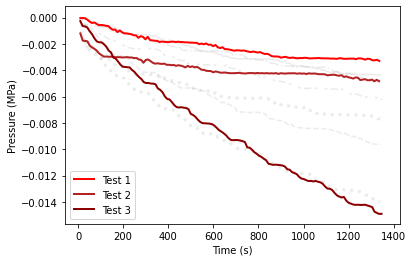

In [19]:
# Substracting the initial pressure from the data to account for pressure drop
plt.plot(static_leakage['O-ring']['Time'],static_leakage['PK']['PressureDrop(bar)'],'tab:grey',alpha=0.15, linestyle='dotted',linewidth=3)   
plt.plot(static_leakage['NAPN']['Time'],static_leakage['KDN']['PressureDrop(bar)'],'tab:grey',alpha=0.15, linestyle='dashdot')
plt.plot(static_leakage['PK']['Time'],static_leakage['O-ring257']['PressureDrop(bar)'],'tab:grey',alpha=0.15,linestyle='dashed')
plt.plot(static_leakage['KDN']['Time'],static_leakage['X-ring257']['PressureDrop(bar)'],'tab:grey',alpha=0.15)
plt.plot(static_leakage['O-ring257']['Time'],static_leakage['O-ring']['PressureDrop(bar)'],'tab:grey',alpha=0.15,linestyle='dotted',linewidth=3)
plt.plot(static_leakage['X-ring257']['Time'],static_leakage['NAPN']['PressureDrop(bar)'],'tab:grey',alpha=0.15, linestyle=(0,(5,2,2)))

plt.plot(static_rerun[1]['Time'],static_rerun[1]['PressureDrop(bar)'],'red',label='Test 1',linewidth=2)
plt.plot(static_rerun[2]['Time'],static_rerun[2]['PressureDrop(bar)'],'firebrick',label='Test 2',linewidth=2)
plt.plot(static_rerun[3]['Time'],static_rerun[3]['PressureDrop(bar)'],'darkred',label='Test 3',linewidth=2)

plt.xlabel('Time (s)')
plt.ylabel('Pressure (MPa)')
plt.legend()
plt.savefig('./figures/rerun_static_leakage.pdf',bbox_inches = 'tight')

